In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import random

# Setup train/test/valid

In [3]:
def separate_test_index(seed=9001,listlen=86,wantnum=7):
    random.seed(seed)
    # define test indices
    testint = ([random.randint(0, listlen-1) for _ in range(wantnum)])
    # list of all indices
    allint = [int(obj) for obj in np.linspace(0,listlen-1,listlen)]
    # filter test indices
    testvalidint = [obj for obj in allint if obj not in testint]
    return testint,testvalidint

In [4]:
# get test index and train-validation indices
testint,testvalidint = separate_test_index()
# Set up seed
random.seed(9001)
# get validation indices
validint = random.sample(testvalidint, 7)
# filter validation indices
trainint = [obj for obj in testvalidint if obj not in validint]

# Process data

In [10]:
path='C:\\Users\\fabau\OneDrive\\Documents\\GitHub\\master-project-cleaned\\data\\time_series_1h_EU\\instantaneous_10m_wind_gust\\instantaneous_10m_wind_gust_max.csv'
timeseries_df = pd.read_csv(path)

# drop the first column
timeseries_df = timeseries_df.drop(columns=[timeseries_df.columns[0]])

# drop the storm index, start date and name columns
timeseries_df = timeseries_df.drop(columns=['storm_index','start_date','storm_name'])

In [11]:
timeseries_df.to_numpy()[trainint,:].shape

(74, 15)

In [12]:
pca = PCA()
pca.fit(timeseries_df)

PCA()

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.71697623, 0.91712943, 0.95089541, 0.96629503, 0.97629115,
       0.98286672, 0.98780044, 0.99063833, 0.99303696, 0.99502971,
       0.99658111, 0.99774483, 0.99860572, 0.99941338, 1.        ])

In [14]:
pca.transform(timeseries_df)[0]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

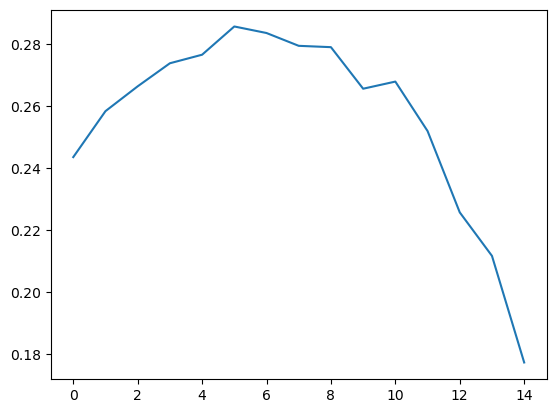

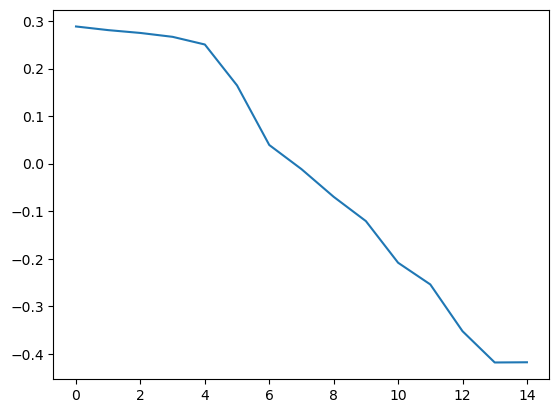

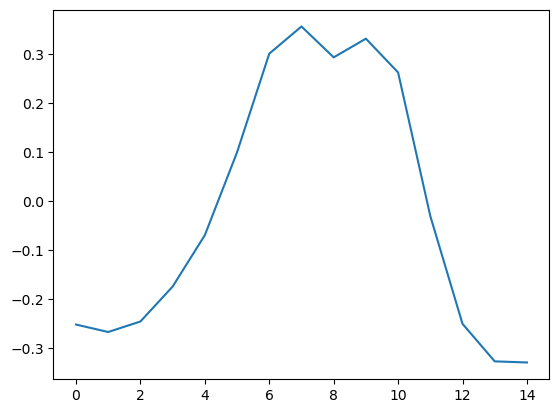

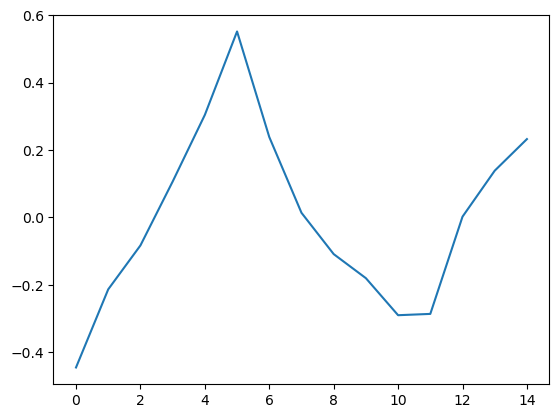

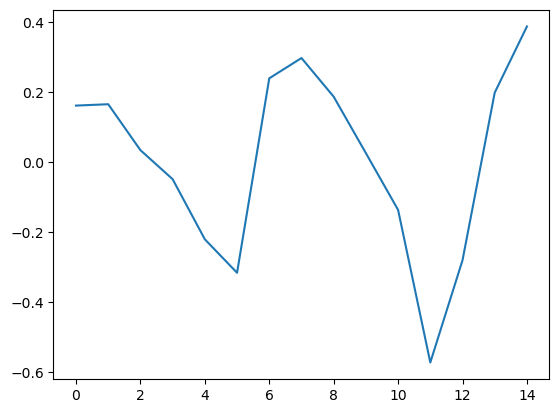

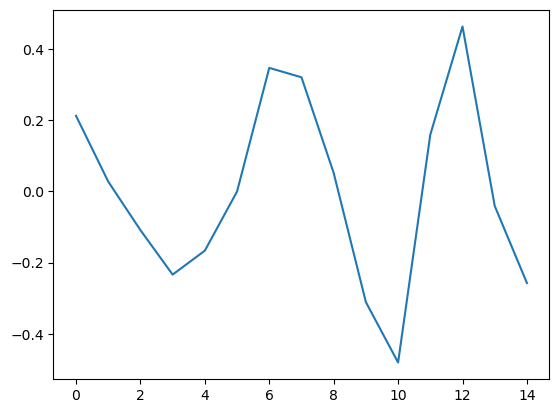

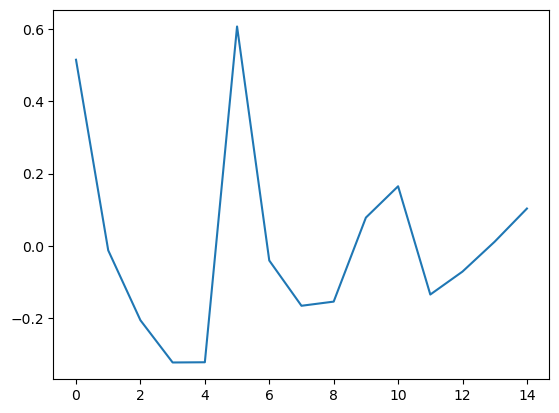

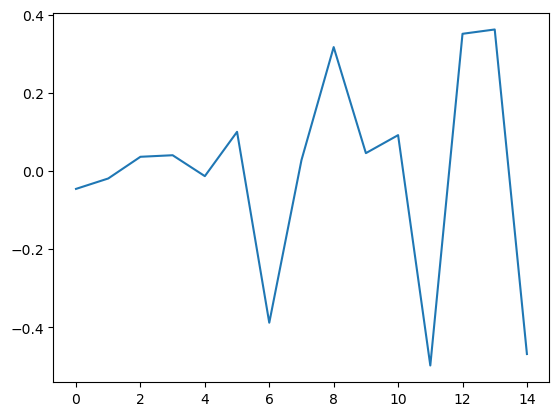

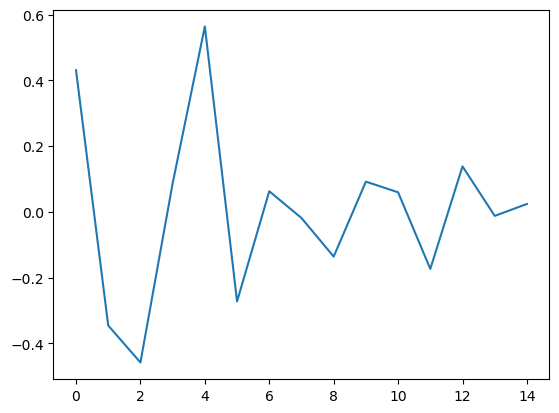

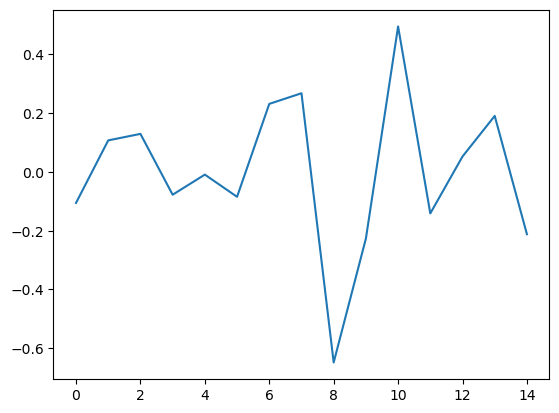

In [17]:
for i in range(0,10):
    plt.plot(pca.components_[i,...])
    plt.show()

In [18]:
pca.transform(timeseries_df)[0,...]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

# function for training set 

In [5]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

print(custom_library_path)

import extraction_squares, time_series

/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/processing


In [3]:
i10fg_max = pd.read_csv('data/time_series_1h_non_EU/2m_dewpoint_temperature/2m_dewpoint_temperature_max.csv')
index_storm_EU = i10fg_max['storm_index'].copy()

storm_index_training, storm_index_test, storm_index_validation = extraction_squares.split_storm_numbers(index_storm_EU)

# order the index of the storms

storm_index_training = storm_index_training.sort_values()
storm_index_test = storm_index_test.sort_values()
storm_index_validation =storm_index_validation.sort_values()

print("Storm Training:", storm_index_training.array[:])
print("Storm Test:", storm_index_test.array[:])
print("Storm Valid:", storm_index_validation.array[:])

Storm Training: <NumpyExtensionArray>
[ 2,  3,  5,  7,  8, 13, 16, 19, 27, 31, 32, 33, 34, 39, 43, 46, 47, 49, 50,
 53, 54, 56, 58, 62, 64, 68, 69, 71, 72, 76, 77, 78, 80, 81, 82, 83, 85, 89,
 90, 95]
Length: 40, dtype: int64
Storm Test: <NumpyExtensionArray>
[29, 38, 45, 48, 66, 86, 87, 93]
Length: 8, dtype: int64
Storm Valid: <NumpyExtensionArray>
[6, 21, 44, 60, 61, 63, 65, 73, 79]
Length: 9, dtype: int64


Explained variance ratio: [0.83888426 0.95923883 0.98011929 0.98857126 0.99276392 0.99619272
 0.997349   0.99841916 0.99881305 0.99904725 0.99923628 0.999393
 0.99950813 0.99959744 0.99967077 0.99973588 0.99977806 0.99981909
 0.99985263 0.99988166 0.99990405 0.99992354 0.99994203 0.99995313
 0.99996375 0.99997184 0.99997869 0.99998488 0.99999005 0.9999934
 0.99999628 0.99999784 0.99999901 0.99999962 0.99999996 1.        ]
We want to keep 98.0 % of the variance, so we need 3 components
Explained variance ratio shape: (36,)
Eigenvalues : [5.08572843e+02 7.29648537e+01 1.26587572e+01 5.12400065e+00
 2.54179550e+00 2.07871133e+00 7.00988998e-01 6.48785891e-01
 2.38796679e-01 1.41981691e-01 1.14600969e-01 9.50089017e-02
 6.97955470e-02 5.41486592e-02 4.44518862e-02 3.94731856e-02
 2.55711863e-02 2.48769277e-02 2.03316183e-02 1.75993110e-02
 1.35761372e-02 1.18188910e-02 1.12045502e-02 6.73337884e-03
 6.43756068e-03 4.90638156e-03 4.15085270e-03 3.75441032e-03
 3.13175201e-03 2.03230428e-03 

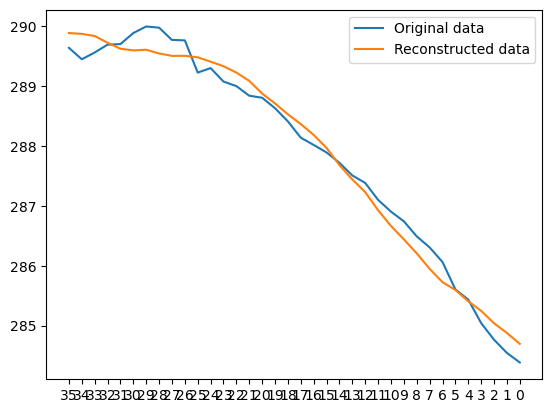

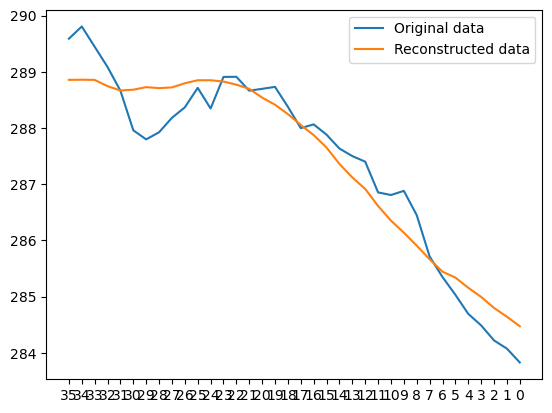

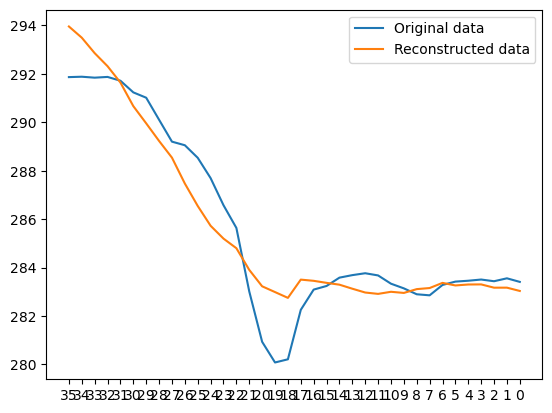

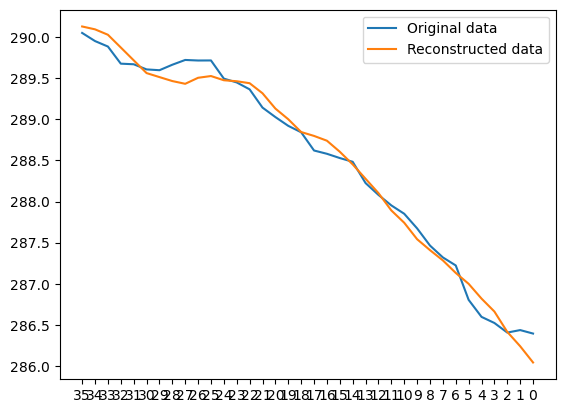

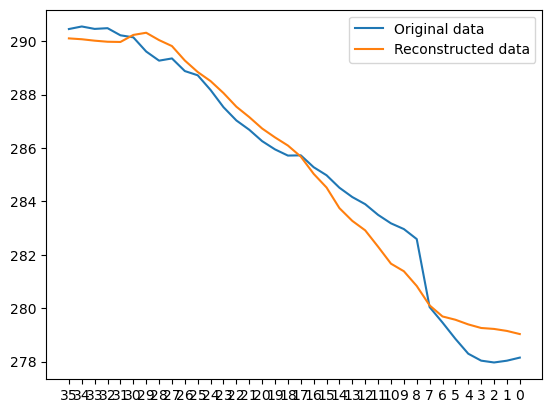

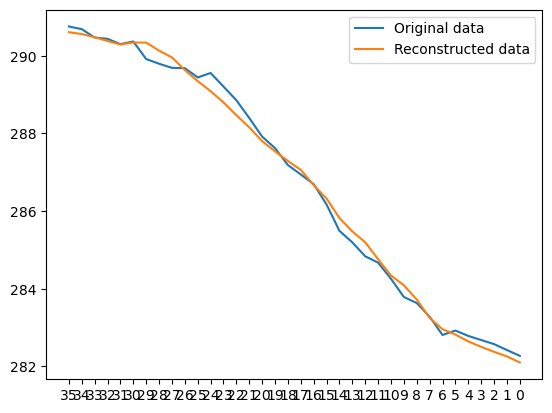

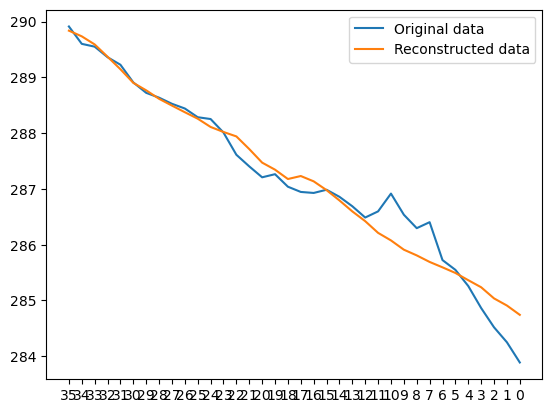

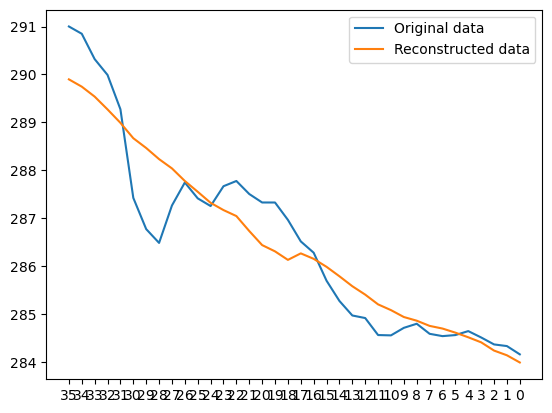

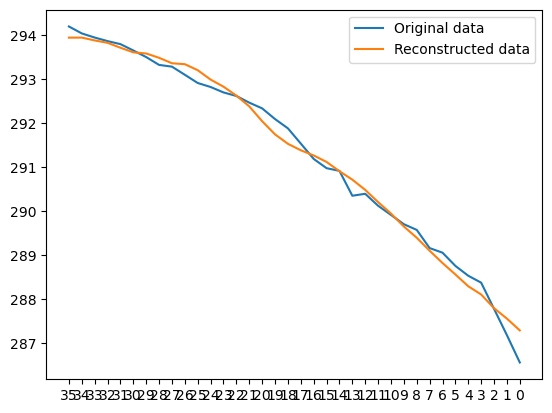

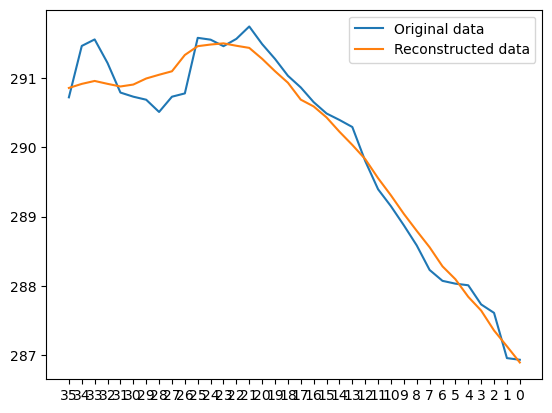

Length of PCA components: 36
Shape of PCA components: (36, 36)


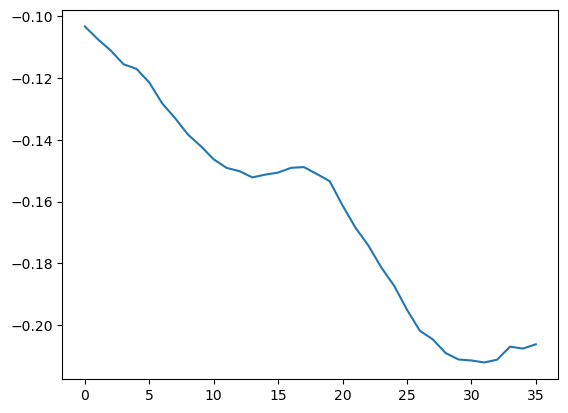

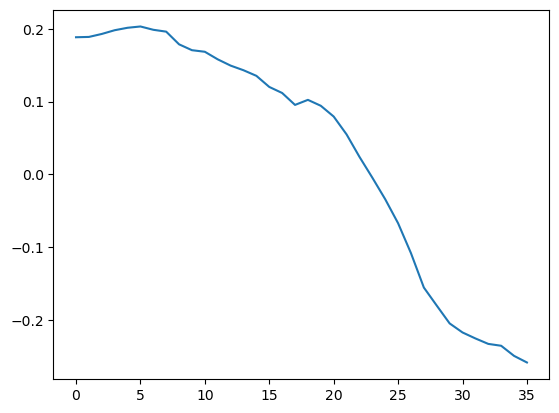

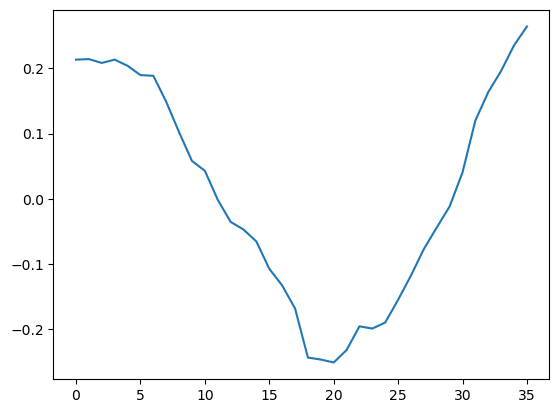

In [33]:
t2m_dewpoint = pd.read_csv('data/time_series_1h_non_EU/2m_dewpoint_temperature/2m_dewpoint_temperature_max.csv')

def get_storms_data(data, storm_index):
    return data.loc[data['storm_index'].isin(storm_index)]

t2m_dewpoint_training = get_storms_data(t2m_dewpoint, storm_index_training)

# drop unneccessary columns
t2m_dewpoint_training = t2m_dewpoint_training.drop(columns=['storm_index','Unnamed: 0'])

# standardize the data by row
'''t2m_dewpoint_training = t2m_dewpoint_training.T
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(t2m_dewpoint_training)
t2m_dewpoint_training_scaler = scaler.transform(t2m_dewpoint_training)
t2m_dewpoint_training = (t2m_dewpoint_training - t2m_dewpoint_training.mean())/t2m_dewpoint_training.std()
#t2m_dewpoint_training = t2m_dewpoint_training.T
'''
#if 1 + 1 == 2:
pca = PCA()
pca.fit(t2m_dewpoint_training)

# how many components are needed to explain 98% of the variance
pca.explained_variance_ratio_.cumsum()
print('Explained variance ratio:', pca.explained_variance_ratio_.cumsum())
# get the number of components needed to explain 98% of the variance
explained_variance = pca.explained_variance_ratio_.cumsum()
# take the first value that is greater than 0.98
threshold = 0.98
# Find the index of the first value meeting the threshold
first_above_idx = np.argmax(explained_variance >= threshold)

# Filter values
n_components = explained_variance[(explained_variance < threshold) | (np.arange(len(explained_variance)) == first_above_idx)]
n_components = explained_variance[:len(n_components)]

#n_components = explained_variance[explained_variance > 0.98]
print('We want to keep', threshold*100,'% of the variance, so we need', n_components.shape[0], 'components')
print('Explained variance ratio shape:', pca.explained_variance_ratio_.shape)
eigenvalues = pca.explained_variance_
print('Eigenvalues :', eigenvalues)
print('Eigenvalues shape:', len(eigenvalues))

# transform the data
scores = pca.transform(t2m_dewpoint_training)
print('Scores shape:', scores.shape)
scores_98 = scores[:, :n_components.shape[0]]
print('Scores shape:', scores_98.shape)
print('The scores are :',scores_98 )

# get the eigenvectors to reconstruct the data
eigenvectors_98 = pca.components_[:n_components.shape[0],:]
mean = pca.mean_

# reconstruct the data
reconstructed_data = np.dot(scores_98, eigenvectors_98) + mean

# what we keep for the input of ML model is the scores_98
scores_98 = pd.DataFrame(scores_98)
scores_98.rename(columns=lambda x: 'PCA_'+str(x+1), inplace=True)
scores_98.to_csv('data/PCA_scores/test_2m_dewpoint_temperature.csv')
# what we keep for the output of ML model is percentile of the wind speed

# plot the original data and the reconstructed data
for j in range(0,10):
    plt.plot(t2m_dewpoint_training.iloc[j,:])
    plt.plot(reconstructed_data[j,:])
    plt.legend(['Original data', 'Reconstructed data'])
    # invert the x-axis
    plt.gca
    plt.gca().invert_xaxis()
    plt.show()
'''    plt.plot(t2m_dewpoint_training.iloc[0,:])
plt.plot(reconstructed_data[0,:])
plt.legend(['Original data', 'Reconstructed data'])
# invert the x-axis
plt.gca
plt.gca().invert_xaxis()
plt.show()'''

print('Length of PCA components:',len(pca.components_))
print('Shape of PCA components:', pca.components_[:].shape)
#print(pca.components_[:])

# get the eigenvectors
for i in range(0,3):
    plt.plot(pca.components_[i,...])
    plt.show()


# Script to define it as a function

In [1]:
from sklearn.preprocessing import StandardScaler

def get_storms_data(data, storm_index):
        return data.loc[data['storm_index'].isin(storm_index)]

def to_pca_components(path, variables, threshold=0.98):

    # Get the storm indices from a non-EU dataset
    x_storms = pd.read_csv(f'{path}data/time_series_1h_non_EU/instantaneous_10m_wind_gust/instantaneous_10m_wind_gust_max.csv')
    index_storm_EU = x_storms['storm_index'].copy()

    # Split the storm indices into training, test and validation based on the storm index
    storm_index_training, storm_index_test, storm_index_validation = extraction_squares.split_storm_numbers(index_storm_EU)

    # order the index of the storms
    storm_index_training = storm_index_training.sort_values()
    storm_index_test = storm_index_test.sort_values()
    storm_index_validation =storm_index_validation.sort_values()

    print("Storm indices for training:", storm_index_training.array[:])
    print("Storm indices for test:", storm_index_test.array[:])
    print("Storm indices for validiation:", storm_index_validation.array[:])

    # Data is stored by statistics
    stats = ['max','min','mean','std']
    # Load the data
    for var in variables['variables']:
        for stat in stats:
            var_name = f'{var}_{stat}'
            var_data = pd.read_csv(f'{path}data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')

            # Select the data for the training set
            var_training = get_storms_data(var_data, storm_index_training)
            # Same for the test set and validation set
            var_test = get_storms_data(var_data, storm_index_test)
            var_validation = get_storms_data(var_data, storm_index_validation)

            # drop unneccessary columns
            var_training = var_training.drop(columns=['storm_index','Unnamed: 0'])
            var_test = var_test.drop(columns=['storm_index','Unnamed: 0'])
            var_validation = var_validation.drop(columns=['storm_index','Unnamed: 0'])

            # standardize the data by row
            var_training = var_training.T
            scaler = StandardScaler()
            scaler.fit(var_training)
            var_training_scaler = scaler.transform(var_training)

            var_test = var_test.T
            scaler = StandardScaler()
            scaler.fit(var_test)
            var_test_scaler = scaler.transform(var_test)

            var_validation = var_validation.T
            scaler = StandardScaler()
            scaler.fit(var_validation)
            var_validation_scaler = scaler.transform(var_validation)

            # Train the PCA model
            pca = PCA()
            pca_test = PCA()
            pca_validation = PCA()
            pca.fit(var_training_scaler)
            pca_test.fit(var_test_scaler)
            pca_validation.fit(var_validation_scaler)

            # get the number of components needed to explain x% of the variance
            explained_variance = pca.explained_variance_ratio_.cumsum()
            explained_variance_test = pca_test.explained_variance_ratio_.cumsum()
            explained_variance_validation = pca_validation.explained_variance_ratio_.cumsum()

            # Find the index of the first value meeting the threshold
            first_above_idx = np.argmax(explained_variance >= threshold)
            first_above_idx_test = np.argmax(explained_variance_test >= threshold)
            first_above_idx_validation = np.argmax(explained_variance_validation >= threshold)

            # Filter values
            n_components = explained_variance[(explained_variance < threshold) | (np.arange(len(explained_variance)) == first_above_idx)]
            n_components = explained_variance[:len(n_components)]

            n_components_test = explained_variance_test[(explained_variance_test < threshold) | (np.arange(len(explained_variance_test)) == first_above_idx_test)]
            n_components_test = explained_variance_test[:len(n_components_test)]

            n_components_validation = explained_variance_validation[(explained_variance_validation < threshold) | (np.arange(len(explained_variance_validation)) == first_above_idx_validation)]
            n_components_validation = explained_variance_validation[:len(n_components_validation)]

            print('We want to keep', threshold*100,'% of the variance, so we need', n_components.shape[0], 'components')

            # Transform the data
            scores = pca.transform(var_training_scaler)
            scores_threshold = scores[:, :n_components.shape[0]]

            scores_test = pca_test.transform(var_test_scaler)
            scores_threshold_test = scores_test[:, :n_components_test.shape[0]]

            scores_validation = pca_validation.transform(var_validation_scaler)
            scores_threshold_validation = scores_validation[:, :n_components_validation.shape[0]]

            # what we keep for the input of ML model is the scores_98
            scores_threshold = pd.DataFrame(scores_threshold)
            scores_threshold.rename(columns=lambda x: 'PCA_'+str(x+1), inplace=True)
            scores_threshold.to_csv(f'data/PCA_scores/training_{var_name}.csv')

            scores_threshold_test = pd.DataFrame(scores_threshold_test)
            scores_threshold_test.rename(columns=lambda x: 'PCA_'+str(x+1), inplace=True)
            scores_threshold_test.to_csv(f'data/PCA_scores/test_{var_name}.csv')

            scores_threshold_validation = pd.DataFrame(scores_threshold_validation)
            scores_threshold_validation.rename(columns=lambda x: 'PCA_'+str(x+1), inplace=True)
            scores_threshold_validation.to_csv(f'data/PCA_scores/validation_{var_name}.csv')

            print(f'PCA scores for {var_name} have been saved')
'''
    # how many components are needed to explain 98% of the variance
    pca.explained_variance_ratio_.cumsum()
    print('Explained variance ratio:', pca.explained_variance_ratio_.cumsum())
    # get the number of components needed to explain 98% of the variance
    explained_variance = pca.explained_variance_ratio_.cumsum()
    # take the first value that is greater than 0.98
    threshold = 0.98
    # Find the index of the first value meeting the threshold
    first_above_idx = np.argmax(explained_variance >= threshold)

    # Filter values
    n_components = explained_variance[(explained_variance < threshold) | (np.arange(len(explained_variance)) == first_above_idx)]
    n_components = explained_variance[:len(n_components)]

    #n_components = explained_variance[explained_variance > 0.98]
    print('We want to keep', threshold*100,'% of the variance, so we need', n_components.shape[0], 'components')
    print('Explained variance ratio shape:', pca.explained_variance_ratio_.shape)
    eigenvalues = pca.explained_variance_
    print('Eigenvalues :', eigenvalues)
    print('Eigenvalues shape:', len(eigenvalues))

    # transform the data
    scores = pca.transform(t2m_dewpoint_training)
    print('Scores shape:', scores.shape)
    scores_98 = scores[:, :n_components.shape[0]]
    print('Scores shape:', scores_98.shape)
    print('The scores are :',scores_98 )

    # get the eigenvectors to reconstruct the data
    eigenvectors_98 = pca.components_[:n_components.shape[0],:]
    mean = pca.mean_

    # reconstruct the data
    reconstructed_data = np.dot(scores_98, eigenvectors_98) + mean

    # what we keep for the input of ML model is the scores_98
    scores_98 = pd.DataFrame(scores_98)
    scores_98.rename(columns=lambda x: 'PCA_'+str(x+1), inplace=True)
    scores_98.to_csv('data/PCA_scores/test_2m_dewpoint_temperature.csv')
    # what we keep for the output of ML model is percentile of the wind speed

    # plot the original data and the reconstructed data
    for j in range(0,10):
        plt.plot(t2m_dewpoint_training.iloc[j,:])
        plt.plot(reconstructed_data[j,:])
        plt.legend(['Original data', 'Reconstructed data'])
        # invert the x-axis
        plt.gca
        plt.gca().invert_xaxis()
        plt.show()
        plt.plot(t2m_dewpoint_training.iloc[0,:])
    plt.plot(reconstructed_data[0,:])
    plt.legend(['Original data', 'Reconstructed data'])
    # invert the x-axis
    plt.gca
    plt.gca().invert_xaxis()
    plt.show()

    print('Length of PCA components:',len(pca.components_))
    print('Shape of PCA components:', pca.components_[:].shape)
    #print(pca.components_[:])

    # get the eigenvectors
    for i in range(0,3):
        plt.plot(pca.components_[i,...])
        plt.show()
'''

"\n    # how many components are needed to explain 98% of the variance\n    pca.explained_variance_ratio_.cumsum()\n    print('Explained variance ratio:', pca.explained_variance_ratio_.cumsum())\n    # get the number of components needed to explain 98% of the variance\n    explained_variance = pca.explained_variance_ratio_.cumsum()\n    # take the first value that is greater than 0.98\n    threshold = 0.98\n    # Find the index of the first value meeting the threshold\n    first_above_idx = np.argmax(explained_variance >= threshold)\n\n    # Filter values\n    n_components = explained_variance[(explained_variance < threshold) | (np.arange(len(explained_variance)) == first_above_idx)]\n    n_components = explained_variance[:len(n_components)]\n\n    #n_components = explained_variance[explained_variance > 0.98]\n    print('We want to keep', threshold*100,'% of the variance, so we need', n_components.shape[0], 'components')\n    print('Explained variance ratio shape:', pca.explained_varia

In [6]:
path = '/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/'
variables = pd.read_csv(f'{path}data/variable_list_levels.csv')
to_pca_components(path,variables, threshold=0.98)

Storm indices for training: <NumpyExtensionArray>
[ 2,  3,  5,  7,  8, 13, 16, 19, 27, 31, 32, 33, 34, 39, 43, 46, 47, 49, 50,
 53, 54, 56, 58, 62, 64, 68, 69, 71, 72, 76, 77, 78, 80, 81, 82, 83, 85, 89,
 90, 95]
Length: 40, dtype: int64
Storm indices for test: <NumpyExtensionArray>
[29, 38, 45, 48, 66, 86, 87, 93]
Length: 8, dtype: int64
Storm indices for validiation: <NumpyExtensionArray>
[6, 21, 44, 60, 61, 63, 65, 73, 79]
Length: 9, dtype: int64
We want to keep 98.0 % of the variance, so we need 9 components
PCA scores for 10m_u_component_of_wind_max have been saved
We want to keep 98.0 % of the variance, so we need 10 components
PCA scores for 10m_u_component_of_wind_min have been saved
We want to keep 98.0 % of the variance, so we need 9 components
PCA scores for 10m_u_component_of_wind_mean have been saved
We want to keep 98.0 % of the variance, so we need 6 components
PCA scores for 10m_u_component_of_wind_std have been saved
We want to keep 98.0 % of the variance, so we need 1

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


We want to keep 98.0 % of the variance, so we need 4 components
PCA scores for geopotential_500_max have been saved
We want to keep 98.0 % of the variance, so we need 4 components
PCA scores for geopotential_500_min have been saved
We want to keep 98.0 % of the variance, so we need 3 components
PCA scores for geopotential_500_mean have been saved
We want to keep 98.0 % of the variance, so we need 6 components
PCA scores for geopotential_500_std have been saved
We want to keep 98.0 % of the variance, so we need 4 components
PCA scores for geopotential_1000_max have been saved
We want to keep 98.0 % of the variance, so we need 3 components
PCA scores for geopotential_1000_min have been saved
We want to keep 98.0 % of the variance, so we need 6 components
PCA scores for geopotential_1000_mean have been saved
We want to keep 98.0 % of the variance, so we need 6 components
PCA scores for geopotential_1000_std have been saved
We want to keep 98.0 % of the variance, so we need 8 components
PC

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py

We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_50_mean have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_50_std have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_70_max have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_70_min have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_70_mean have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_70_std have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_100_max have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py

PCA scores for specific_rain_water_content_700_mean have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_700_std have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_800_max have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_800_min have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_800_mean have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_800_std have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_850_max have been saved
We want to keep 98.0 % of the variance, so we need 1 components
PCA scores for specific_rain_water_content_850_min have been saved
We want to kee

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/decomposition/_pca.py

We want to keep 98.0 % of the variance, so we need 21 components
PCA scores for vertical_velocity_10_mean have been saved
We want to keep 98.0 % of the variance, so we need 18 components
PCA scores for vertical_velocity_10_std have been saved
We want to keep 98.0 % of the variance, so we need 21 components
PCA scores for vertical_velocity_20_max have been saved
We want to keep 98.0 % of the variance, so we need 21 components
PCA scores for vertical_velocity_20_min have been saved
We want to keep 98.0 % of the variance, so we need 18 components
PCA scores for vertical_velocity_20_mean have been saved
We want to keep 98.0 % of the variance, so we need 22 components
PCA scores for vertical_velocity_20_std have been saved
We want to keep 98.0 % of the variance, so we need 21 components
PCA scores for vertical_velocity_30_max have been saved
We want to keep 98.0 % of the variance, so we need 18 components
PCA scores for vertical_velocity_30_min have been saved
We want to keep 98.0 % of the 